<h1>Description</h1>
<h2>Context</h2>

<p> Customer churn occurs when customers or subscribers stop doing business with a company or service. Also known as customer attrition, customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers – earning business from new customers means working leads all the way through the sales funnel, utilizing your marketing and sales resources throughout the process. Customer retention, on the other hand, is generally more cost-effective, as you have already earned the trust and loyalty of existing customers.  </p>

<h2>Goal</h2>
<p>"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]]</p>

<h2>Content</h2>

<p>Each row represents a customer; each column contains customer’s attributes described in the column Metadata.
The data set includes information about:
</p>

<ul>
<li>Customers who left within the last month – the column is called Churn
<li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
<li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
<li>Demographic info about customers – gender, age range, and if they have partners and dependents
</ul>
<h2>Source:</h2>
<a href="https://www.kaggle.com/blastchar/telco-customer-churn">https://www.kaggle.com/blastchar/telco-customer-churn</a>
  

This notebook will include 2 tasks (Inicial Data Exploration and Extract, Transform,	Load)

<h3>1. Initial Data Exploration</h3>
<ul>
<li> Identify quality issues (e.g. missing values, wrong measurements, …)</li>
<li>Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)</li>
<li>Get an idea on the value distribution of your data using statistical measures and visualizations</li>
</ul>    

<h3>2. Extract,	Transform,	Load	(ETL) </h3>

<ul> 
<li>Accessing the data source;</li>
<li>Transforming data source; </li>
</ul>
    

<h3>2.1 Extraction</h3> 
The data set is in csV format. It was updated as an IBM Cloud Object Storage. It was used pandas dataframe to manipulate the data extracted.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


After loading the file, we could notice that some columns are categorical and some are numerical. So, the first step it checks if it has some inconsistent data (missing values, wrong measurements, etc.)

In [7]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Chek if there is any column with null values
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Notice total charges are an object type. It might need to be converted to the appropriate type.

In [9]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is no NaN values.

In [10]:
#Get a overview of each column
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#Get maximum values
telco.max()

customerID            9995-HOTOH
gender                      Male
SeniorCitizen                  1
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                 Yes
MultipleLines                Yes
InternetService               No
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges               999.9
Churn                        Yes
dtype: object

In [12]:
#Get minimum values
telco.min()

customerID                         0002-ORFBO
gender                                 Female
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                      0
PhoneService                               No
MultipleLines                              No
InternetService                           DSL
OnlineSecurity                             No
OnlineBackup                               No
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          18.25
TotalCharges                                 
Churn                                      No
dtype: object

In [13]:
#Checking unique values
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<p>After checking the max, min and unique values, it is possible to see some data inconsistencies. TotalCharges has empty cells. Some columns have three different values but their max and min are 'yes' or 'no'. In this case, these columns might have some ambiguous values that can be replaced by 'yes' or 'no'.</p>

<ul>
<li> MultipleLines         = 3</li>
<li> InternetService       = 3</li>
<li> OnlineSecurity        = 3</li>
<li> OnlineBackup          = 3</li>
<li> DeviceProtection      = 3</li>
<li> TechSupport           = 3</li>
<li> StreamingTV           = 3</li>
<li> StreamingMovies       = 3</li>
<li> Contract              = 3</li>
</ul>    

In [14]:
print('Empty cells in TotalCharges: ', len(telco[telco['TotalCharges']==' ']))

Empty cells in TotalCharges:  11


Before starting some data visualization, it’s necessary to fix some issues and <b>transform</b> the data set (making it easy to manipulate).

<h3>2.2 Transform</h3>
<h3>2.2.1 Transformation: Removing rows with empty cells (Total Charges)</h3>
First, remove rows where TotalCharges column has empty cells.

In [15]:
#number of rows
nrows_before=len(telco) 
#removing empty cells from TotalCharges (remove associeted rows)
telco=telco[telco['TotalCharges']!=' ']
#Number of rows after remove emptys TotalCharges
nrows_after=len(telco)
#Reset inted
telco.reset_index(inplace=True)
telco.drop('index', axis=1, inplace=True)
#Lost data
print(("lost data: {0:.3f} %").format(100*(1-nrows_after/nrows_before)))

lost data: 0.156 %


<h3>2.2.2 Transformation: Converting to float (Total Charges)</h3>
The amount of lost data is really small and it will not impact in the model. The next step is to convert TotalCharges to float (considering its format is a string).

In [16]:
telco["TotalCharges"] = telco["TotalCharges"].astype(float)


In [17]:
print("TotalCharges type:", telco["TotalCharges"].dtypes)

TotalCharges type: float64


Another problem pointed out was the ambiguous columns. The next step is to check these columns



In [18]:
#Checking columns with 3 different unique values 
check_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies']
for c in check_cols:
    print( c + '=', telco[c].unique())


MultipleLines= ['No phone service' 'No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes' 'No internet service']
OnlineBackup= ['Yes' 'No' 'No internet service']
DeviceProtection= ['No' 'Yes' 'No internet service']
TechSupport= ['No' 'Yes' 'No internet service']
StreamingMovies= ['No' 'Yes' 'No internet service']


<h3>2.2.3 Transformation: replace to (yes,no) (SeniorCitizen)</h3>
This transformation will just be temporary for some exploratory data analysis

In [19]:
telco["SeniorCitizen"] = telco["SeniorCitizen"].replace(to_replace=[0, 1], value=['No', 'Yes'])

In [20]:
print("SeniorCitizen unquies: ", telco["SeniorCitizen"].unique())

SeniorCitizen unquies:  ['No' 'Yes']


<h3>2.2.4 Transformation: Replacing ambiguous values</h3>

As you can see, No 'Internet Service/No phone service' is equivalent to 'no'. For these cases, they will be replaced. For now, Internet Service column will not be modified.

In [21]:
#Replace 'No internet service','No phone service' to 'No'
telco.replace(['No internet service','No phone service'],'No', inplace=True)


In [22]:
for c in check_cols:
    print( c + '=', telco[c].unique())

MultipleLines= ['No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes']
OnlineBackup= ['Yes' 'No']
DeviceProtection= ['No' 'Yes']
TechSupport= ['No' 'Yes']
StreamingMovies= ['No' 'Yes']


Analyzing column-only values again:

In [23]:
for c in telco.columns:
    print( c + '=', telco[c].unique())

customerID= ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender= ['Female' 'Male']
SeniorCitizen= ['No' 'Yes']
Partner= ['Yes' 'No']
Dependents= ['No' 'Yes']
tenure= [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService= ['No' 'Yes']
MultipleLines= ['No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes']
OnlineBackup= ['Yes' 'No']
DeviceProtection= ['No' 'Yes']
TechSupport= ['No' 'Yes']
StreamingTV= ['No' 'Yes']
StreamingMovies= ['No' 'Yes']
Contract= ['Month-to-month' 'One year' 'Two year']
PaperlessBilling= ['Yes' 'No']
PaymentMethod= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges= [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges= [  29.85 1889.5   108.15 ...  346.45  306.6  6

In [24]:
#Separation of categorical and numerical columns
cat_cols = telco.select_dtypes(include='object')
num_cols = telco.select_dtypes(exclude='object')

<h3>2.3 Exploratory analysis and data visualization </h3>
<h3>2.3.1 Heatmap - correlation of numerical variables</h3>

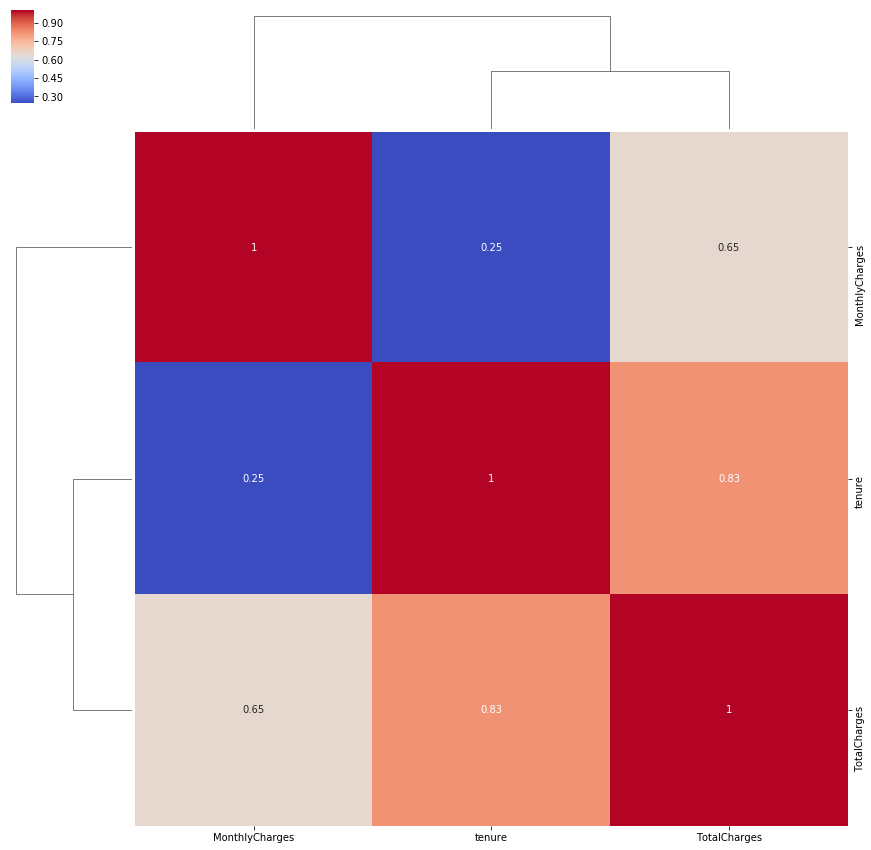

In [25]:
sns.clustermap(num_cols.corr(),linecolor='white',cmap='coolwarm',annot=True, figsize=(15,15))
sns.set_context("paper", font_scale=2)   

As you can see, tenure and Totalcharges have a close correlation. Also, TotalCharges and MonthlyCharge have a relevant correlation.

<h3>2.3.2 Correlation of numeric variables and Churn distribution</h3>

C:\Users\Fernando\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


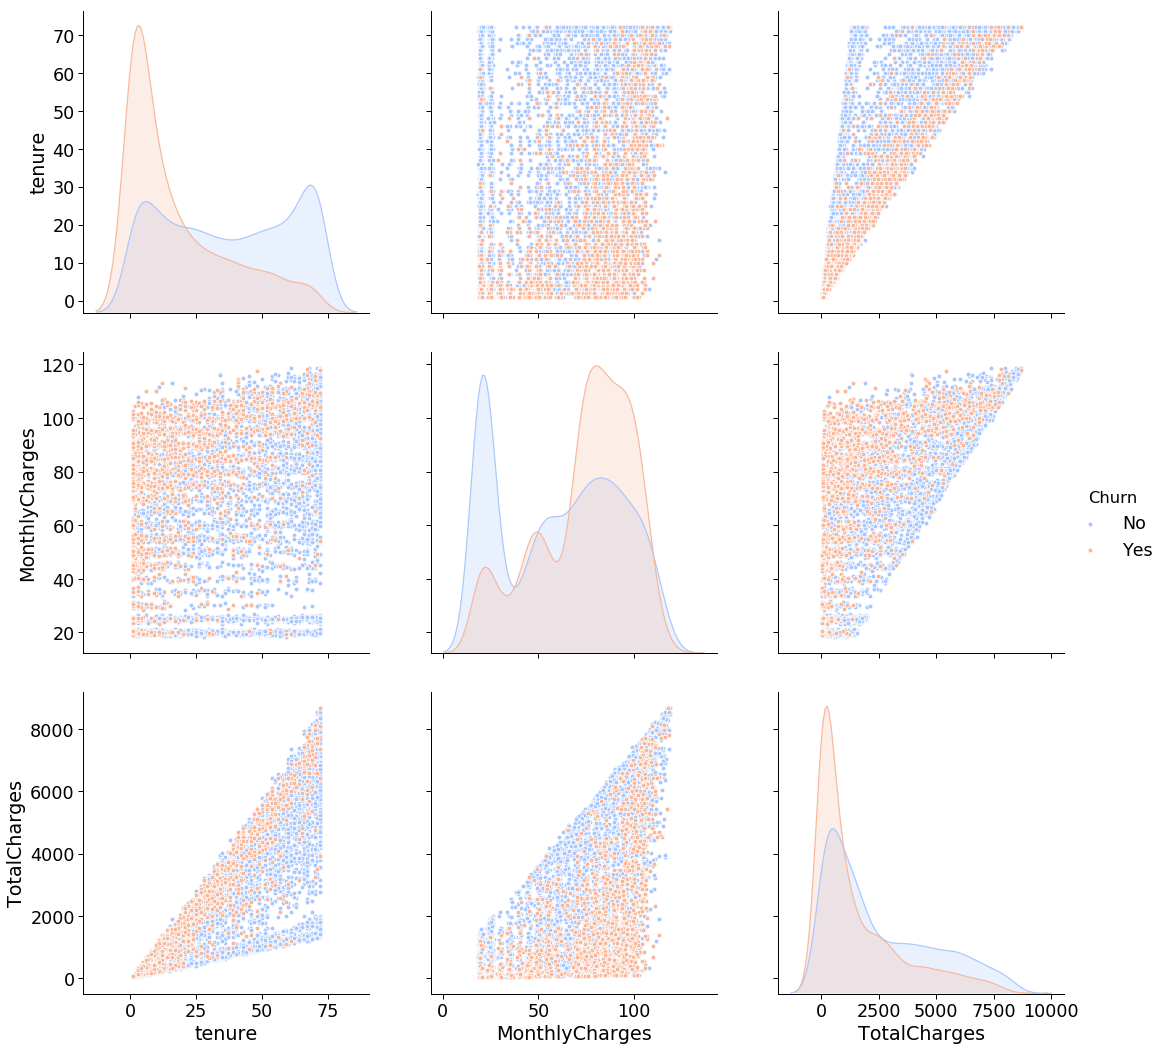

In [26]:
sns.pairplot(telco, hue='Churn', palette='coolwarm', size=5)


Notice the correlation between Total Charges X Tenure and Total Charges X Monthly Charges.

<h3>2.3.3 Distribution of numeric columns</h3>

C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


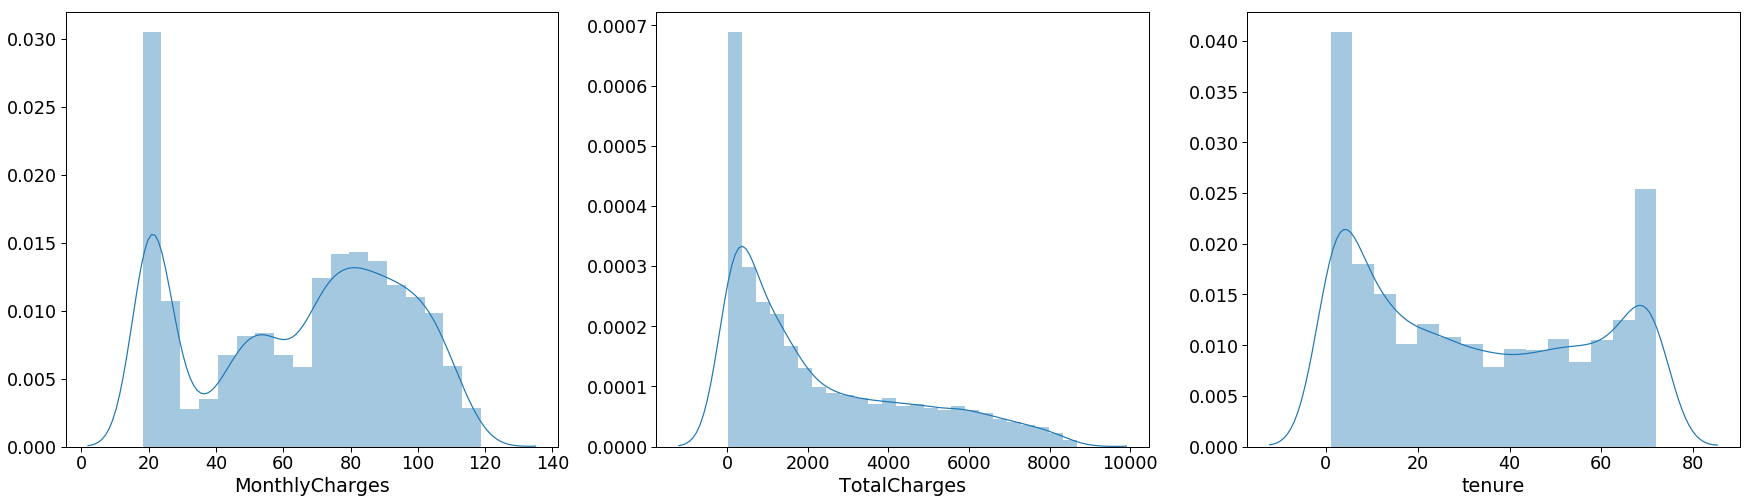

In [27]:
f, axes = plt.subplots(nrows=1,ncols=3, squeeze=True,figsize=(30, 8))

sns.distplot(telco['MonthlyCharges'], ax=axes[0])

sns.distplot(telco['TotalCharges'],  ax=axes[1])

sns.distplot(telco['tenure'], ax=axes[2])


 <h3>2.3.4 Checking distribution between numeric columns and Churn</h3>

C:\Users\Fernando\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


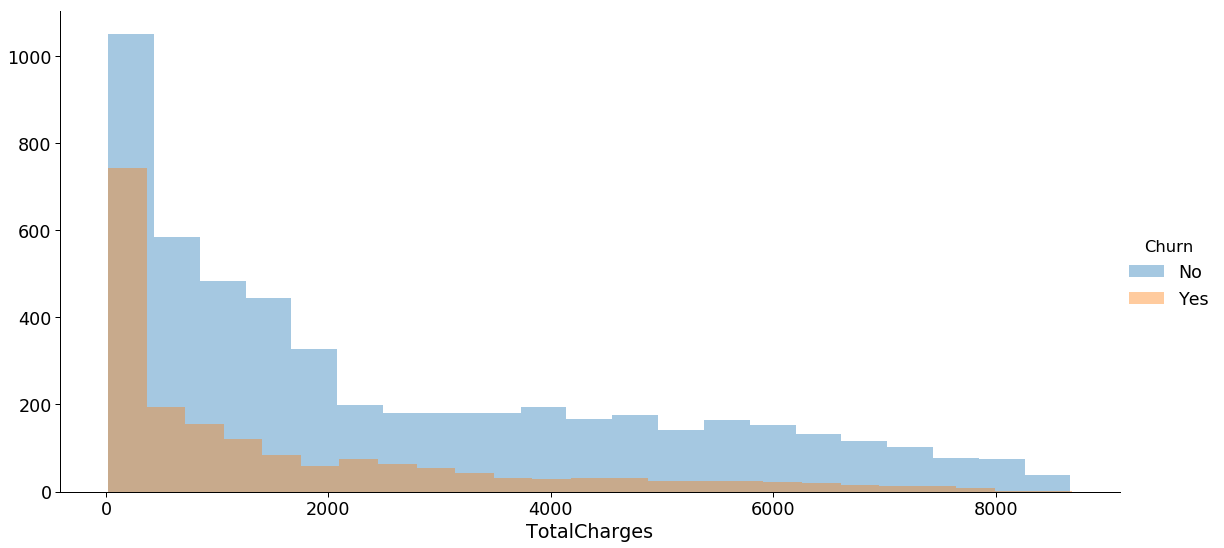

In [28]:
#TotalCharges vS  Churn
g = sns.FacetGrid(telco, hue="Churn", size=8, aspect=2,legend_out=True)
g = (g.map(sns.distplot, "TotalCharges", kde=False).add_legend())


C:\Users\Fernando\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


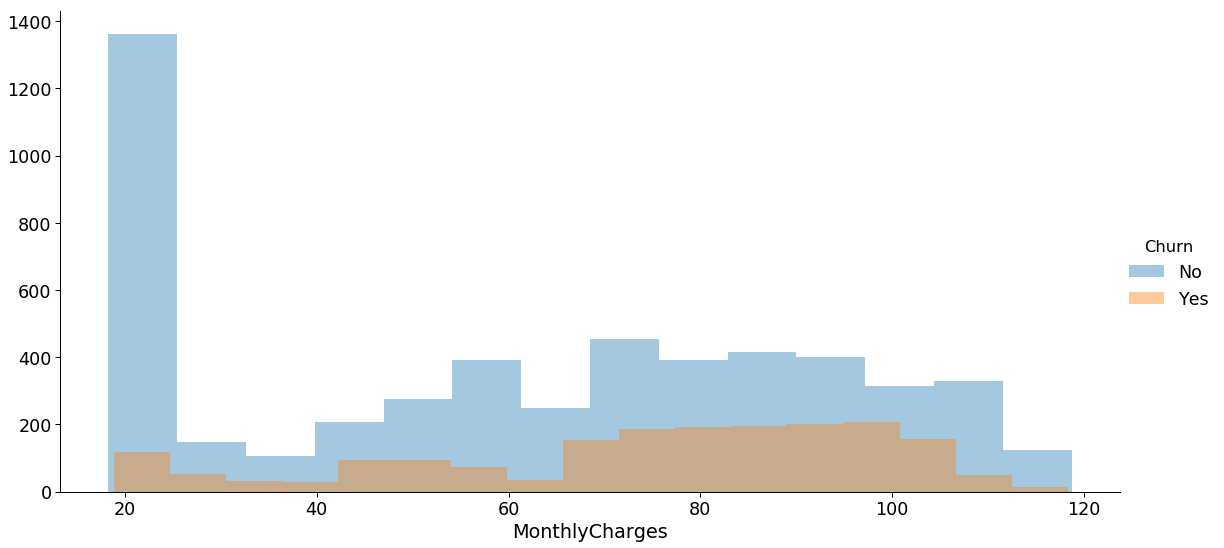

In [29]:
#MonthlyCharges vS  Churn
g = sns.FacetGrid(telco, hue="Churn", size=8, aspect=2,legend_out=True)
g = (g.map(sns.distplot, "MonthlyCharges", kde=False).add_legend())

C:\Users\Fernando\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


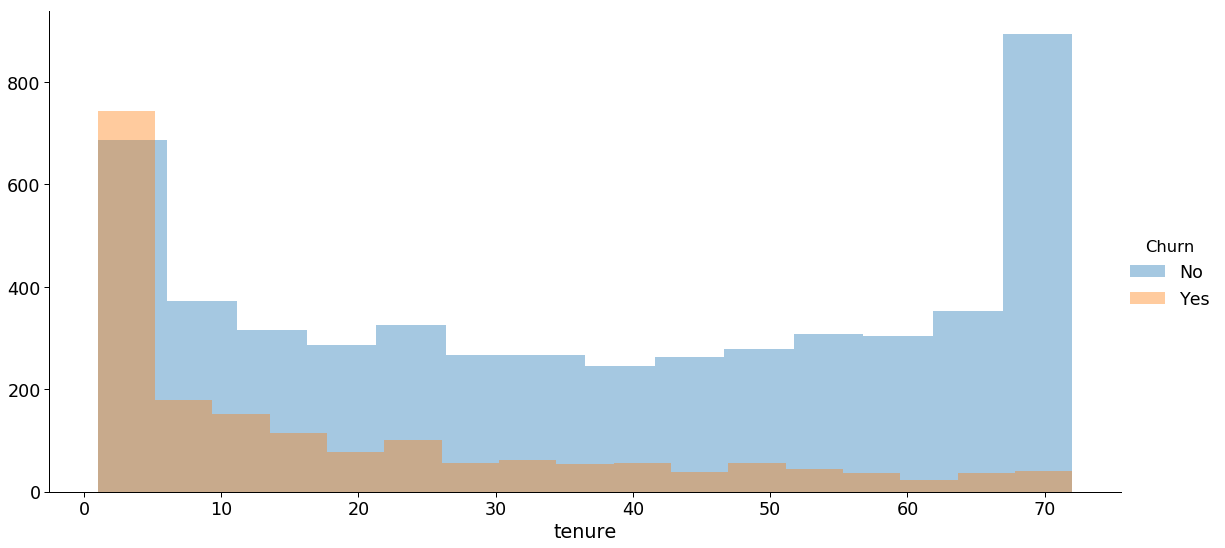

In [30]:
#Tenure vS  Churn
g = sns.FacetGrid(telco, hue="Churn", size=8, aspect=2,legend_out=True)
g = (g.map(sns.distplot, "tenure", kde=False).add_legend())

Note that most of the churn values are in Total Charges <100.

<h3>2.3.5 Categorical columns comparison</h3>

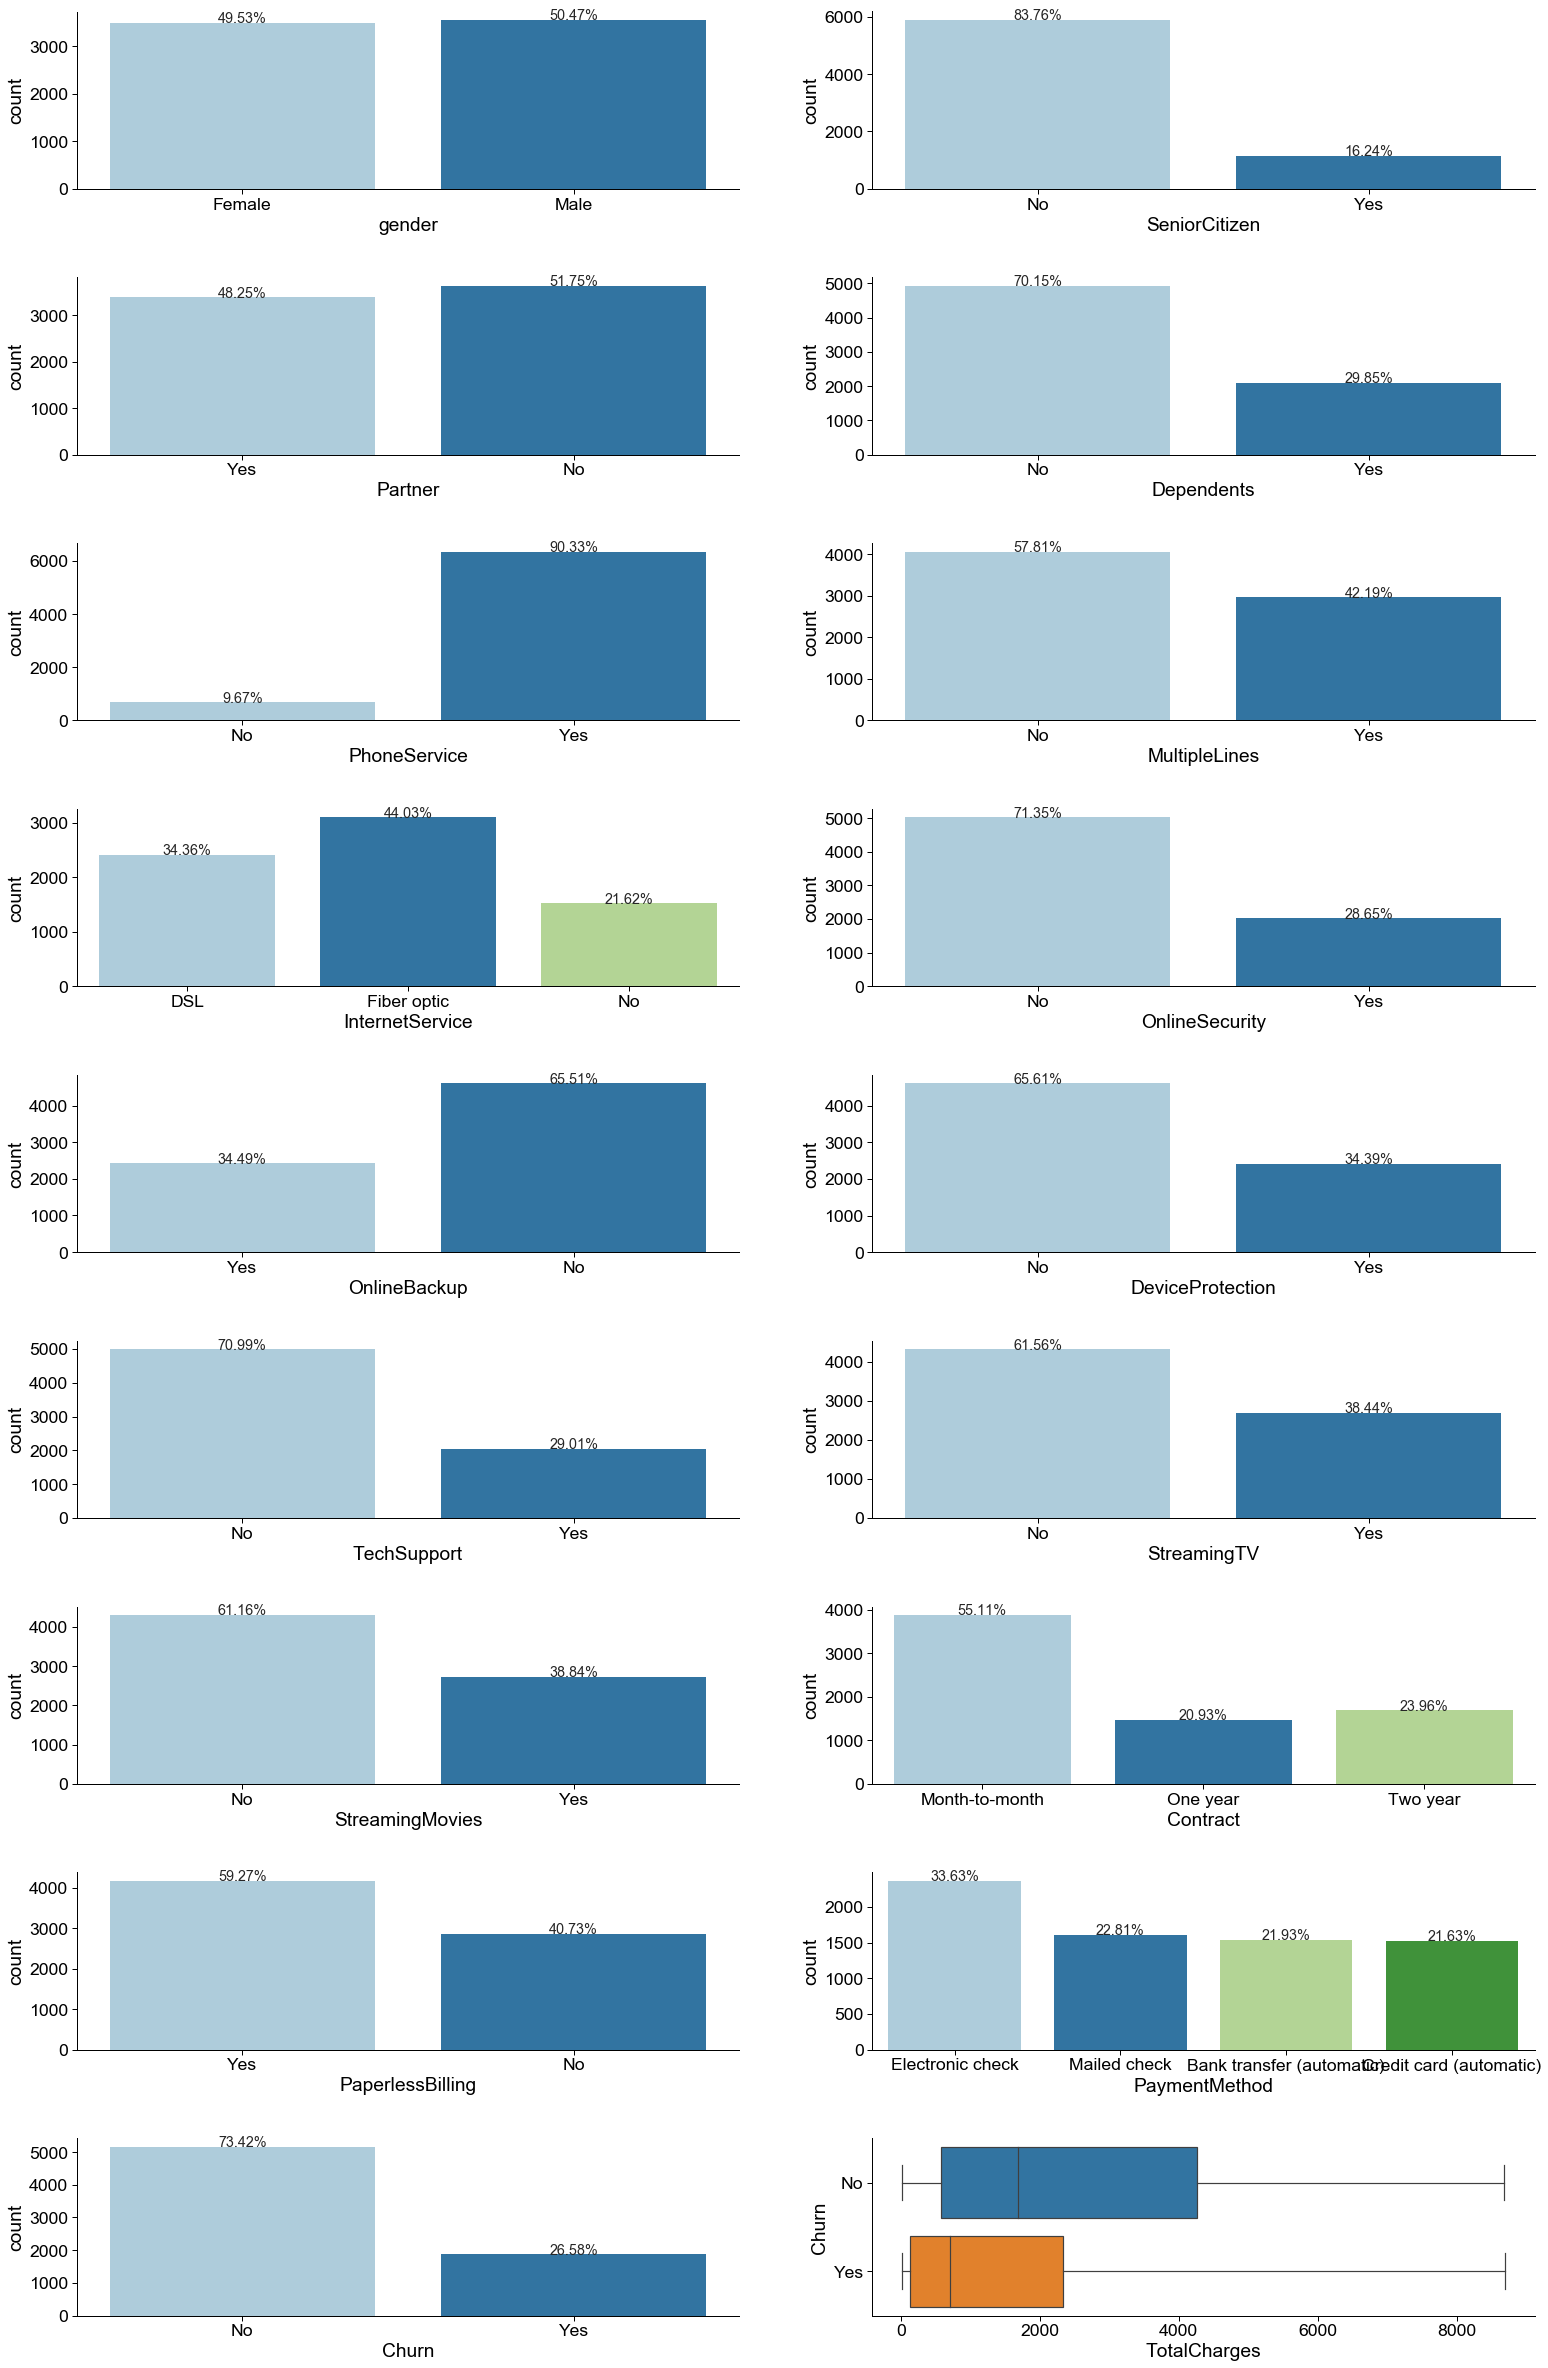

In [31]:
import math
f, axes = plt.subplots(nrows=math.ceil(len(cat_cols.columns[1:])/2),ncols=2,figsize=(30, 40))
graf_count = []
i=0
j=0
for col in cat_cols.columns[1:]:
    graf_count.append(sns.countplot(x=col,data=telco, ax=axes[i,j],palette="Paired"))
    j=j+1
    if j==2:
        i=i+1
        j=0
graf_count.append(sns.boxplot(x="TotalCharges", y="Churn", data=telco, whis=np.inf))
sns.set_context("paper", font_scale=1.5)      
sns.set_style("white")
sns.despine()

total = float(len(telco)) 
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace = 0.5)


for g in graf_count:
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 


In [32]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3>3. Feature	Creation</h3>
    
<ul>
<li>Filling of empty fields based on its value distribution</li>
<li>Imputed time-series quantization Time series often contain streams with measurements at different timestamps</li>
<li>Scaling / Normalizing / Centering</li>
<li>Filtering - Sometimes imputing values doesn’t perform well</li>
<li>Discretizing - Continuous fields might confuse the model</li>
</ul>    

Looking again at the tenure, it can be separated into different boxes and create a new category column. In this case, it has been separated by intervals of years:

<ul>
<li>0-1 year (0-12 months)</li>
<li>1-2 year (12-24 months)</li>
<li>2-3 year (24-36 months)</li>
<li>3-4 year (36-48 months)</li>
<li>4-5 year (48-60 months)</li>
<li>5-6 year (60-72 months)</li>
</ul>    


In [33]:
#Tenure to Categorical
def tenure_cat(telco) :
    
    if telco["tenure"] <= 12 :
        return "0-1_year"
    elif (telco["tenure"] > 12) & (telco["tenure"] <= 24):
        return "1-2_year"
    elif (telco["tenure"] > 24) & (telco["tenure"] <= 36):
        return "2-3_year"
    elif (telco["tenure"] > 36) & (telco["tenure"] <= 48):
        return "3-4_year"
    elif (telco["tenure"] > 48) & (telco["tenure"] <= 60):
        return "4-5_year"
    elif telco["tenure"] > 60:
        return "5-6_year"

telco["tenure_years"] = telco.apply(lambda t:tenure_cat(t), axis = 1)

In [34]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_years
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1_year
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3_year
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1_year
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4_year
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1_year


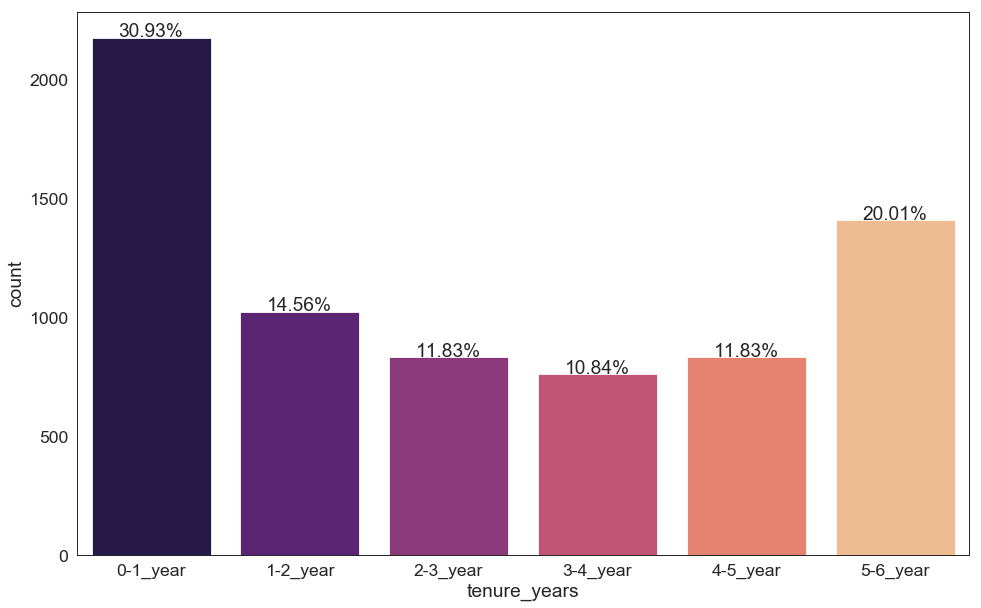

In [35]:
telco['tenure_years'].value_counts().sort_index().index
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set_context(context='paper', font_scale=2)
g=sns.countplot(x="tenure_years", data=telco, palette="magma", order=telco['tenure_years'].value_counts().sort_index().index)
total = float(len(telco)) 

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
    height + 3,'{:1.2f}%'.format(100*height/total), ha="center") 

<h3>3.2 Creating Dummy columns (One-hot-encoding) </h3>
Next task is create some dummy columns 

In [36]:
cat_cols = telco.select_dtypes(include='object')
num_cols = telco.select_dtypes(exclude='object')
cat_cols=cat_cols.drop("customerID", axis=1)


In [37]:
telco=pd.get_dummies(data = telco,columns =  cat_cols.columns, drop_first=True)
telco.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_years_1-2_year,tenure_years_2-3_year,tenure_years_3-4_year,tenure_years_4-5_year,tenure_years_5-6_year
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [38]:
telco.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_years_1-2_year,tenure_years_2-3_year,tenure_years_3-4_year,tenure_years_4-5_year,tenure_years_5-6_year
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.504693,0.162400,0.482509,0.298493,0.903299,0.421928,0.440273,...,0.592719,0.216297,0.336320,0.228100,0.265785,0.14562,0.118316,0.108362,0.118316,0.200085
std,24.545260,30.085974,2266.771362,0.500014,0.368844,0.499729,0.457629,0.295571,0.493902,0.496455,...,0.491363,0.411748,0.472483,0.419637,0.441782,0.35275,0.323005,0.310859,0.323005,0.400092
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


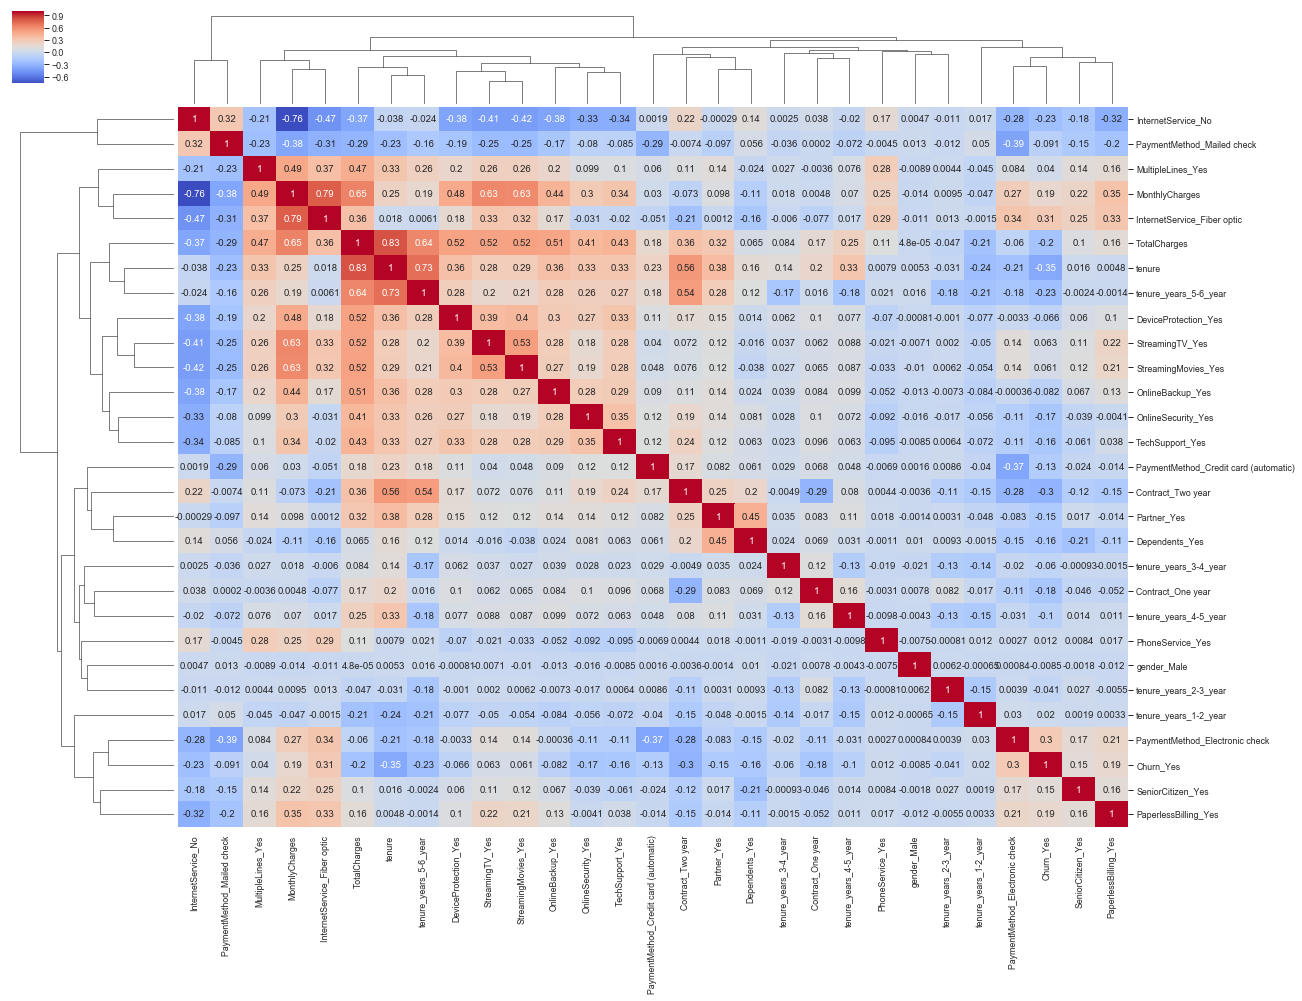

In [39]:
sns.set_context("paper", font_scale=1)  
sns.clustermap(telco.corr(),linecolor='white',cmap='coolwarm', figsize=(20,15), annot=True)

<h3>3.3 Normalization</h3>

A normalization is applied to the numeric columns (Total Charges, Tenure, Month Charges)

In [40]:
from sklearn.preprocessing import StandardScaler

#Normalize the mesure (numerical columns)
scale = StandardScaler()
scale.fit_transform(num_cols)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [41]:
#scale
scaled_features = scale.transform(num_cols)
#Create a panda DF with scaled features
telco_feat = pd.DataFrame(scaled_features, columns= num_cols.columns)
#Concat this new DF with Telco DF
telco_feat = pd.concat([telco_feat, telco.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)], axis=1)
#Move Target columns to the last column position


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Renaming and fixing some columns names

In [42]:
telco_feat['Churn'] = telco_feat['Churn_Yes']
telco_feat.drop('Churn_Yes', axis=1, inplace=True)

telco_feat.rename(columns={'InternetService_Fiber optic':'InternetService_Fiber_Optic',
                          'PaymentMethod_Credit card (automatic)':'PaymentMethod_Credit_card_Auto',
                          'PaymentMethod_Electronic check':'PaymentMethod_Electronic_Check',
                          'PaymentMethod_Mailed check':'PaymentMethod_Mailed_check',
                           'Contract_One year':'Contract_One_year',
                           'Contract_Two year':'Contract_Two_year'
                          }, 
                 inplace=True)

In [43]:
telco_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
tenure                            7032 non-null float64
MonthlyCharges                    7032 non-null float64
TotalCharges                      7032 non-null float64
customerID                        7032 non-null object
gender_Male                       7032 non-null uint8
SeniorCitizen_Yes                 7032 non-null uint8
Partner_Yes                       7032 non-null uint8
Dependents_Yes                    7032 non-null uint8
PhoneService_Yes                  7032 non-null uint8
MultipleLines_Yes                 7032 non-null uint8
InternetService_Fiber_Optic       7032 non-null uint8
InternetService_No                7032 non-null uint8
OnlineSecurity_Yes                7032 non-null uint8
OnlineBackup_Yes                  7032 non-null uint8
DeviceProtection_Yes              7032 non-null uint8
TechSupport_Yes                   7032 non-null uint8
StreamingTV_Yes       

In [44]:
telco_feat.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber_Optic,...,PaperlessBilling_Yes,PaymentMethod_Credit_card_Auto,PaymentMethod_Electronic_Check,PaymentMethod_Mailed_check,tenure_years_1-2_year,tenure_years_2-3_year,tenure_years_3-4_year,tenure_years_4-5_year,tenure_years_5-6_year,Churn
count,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,-1.214741e-16,9.652878e-17,-1.172113e-16,0.504693,0.162400,0.482509,0.298493,0.903299,0.421928,0.440273,...,0.592719,0.216297,0.336320,0.228100,0.14562,0.118316,0.108362,0.118316,0.200085,0.265785
std,1.000071e+00,1.000071e+00,1.000071e+00,0.500014,0.368844,0.499729,0.457629,0.295571,0.493902,0.496455,...,0.491363,0.411748,0.472483,0.419637,0.35275,0.323005,0.310859,0.323005,0.400092,0.441782
min,-1.280248e+00,-1.547283e+00,-9.990692e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.394171e-01,1.845440e-01,-3.908151e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.199259e-01,8.331482e-01,6.668271e-01,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.612573e+00,1.793381e+00,2.824261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Cheking the correlation between Churn and the other variables

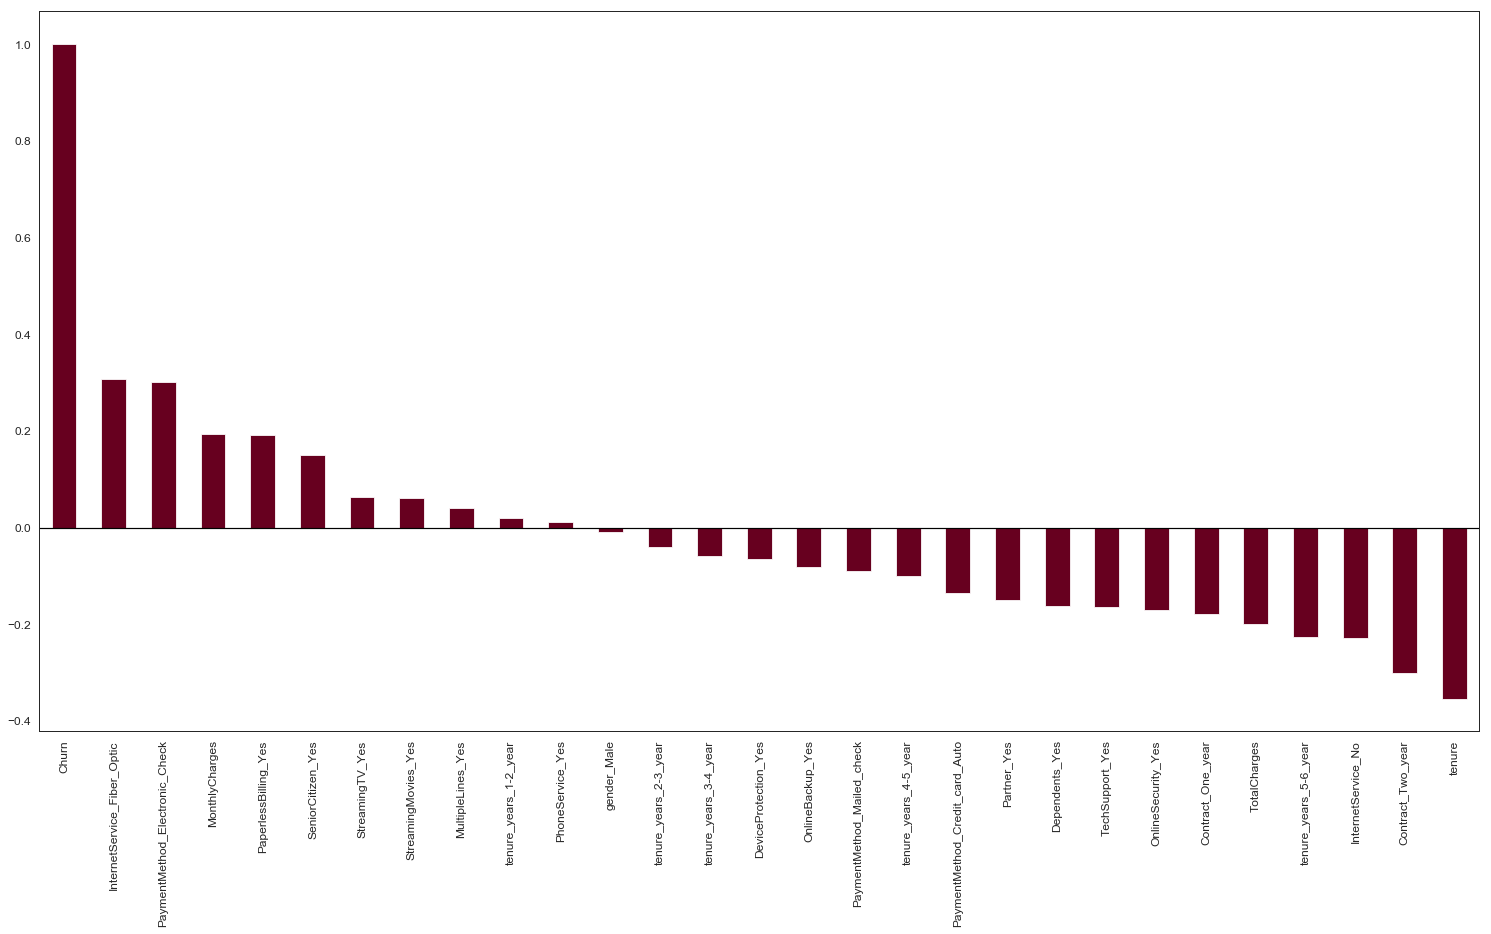

In [45]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

#Bart plot
telco_feat.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', cmap='RdGy', )

#Change font size
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

ax.axhline(0, color='black')
    
total=len(telco_feat.corr()['Churn'])

<h3>4. Model Definition and Training</h3>
<ul>
<li>Selecting model performance indicator</li>
<li>Implementing algorithm</li>
<li>Appling additional iteration</li>
<li>Training</li>
</ul>


In [46]:
telco=telco_feat

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix 
%matplotlib inline

Splitting the dataset in train and test 30% (Test size)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(telco.drop(['customerID','Churn'],axis=1),telco['Churn'],
                                                    test_size=0.30)

In [54]:
max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

Applying GridSearch to find better parameters:

In [55]:
#GridSearch 
parameters = {
    'n_estimators'      : [100,150,200,250,500],
    'max_depth'         : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'random_state'      : [0],
}
grid_rfc = GridSearchCV(RandomForestClassifier(), parameters, refit=True, verbose=3, scoring='accuracy', cv=5, n_jobs=4) 

In [56]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   35.2s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [100, 150, 200, 250, 500], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [57]:
#RESULTS
churn = {'rfc':[grid_rfc.best_params_,grid_rfc.best_score_]}
print('Parametros', grid_rfc.best_params_)
print('Accuracy', grid_rfc.best_score_)
print('Estimator:', grid_rfc.best_estimator_)

Parametros {'max_depth': 8, 'n_estimators': 100, 'random_state': 0}
Accuracy 0.8023161316537992
Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Checking the best estimator:

In [58]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
pred = rfc.predict(X_test)

In [61]:
print("Churn")
print("Classification Report")
print(classification_report(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print('Accuracy', churn['rfc'][1])

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1523
           1       0.69      0.50      0.58       587

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix
[[1394  129]
 [ 295  292]]
Accuracy 0.8023161316537992


In [62]:
cm=confusion_matrix(y_test,pred)

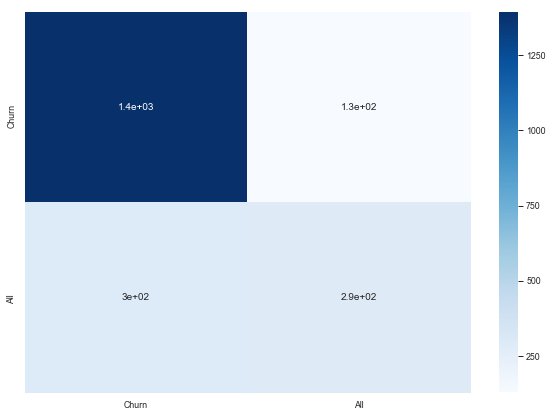

In [63]:
df_cm = pd.DataFrame(cm, index = ['Churn','All'],
                  columns = ['Churn','All'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [64]:
cv_scores = []
for i in max_depth:
    
    rfc_e = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
    scores = cross_val_score(rfc_e, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of Max Depth is: 10


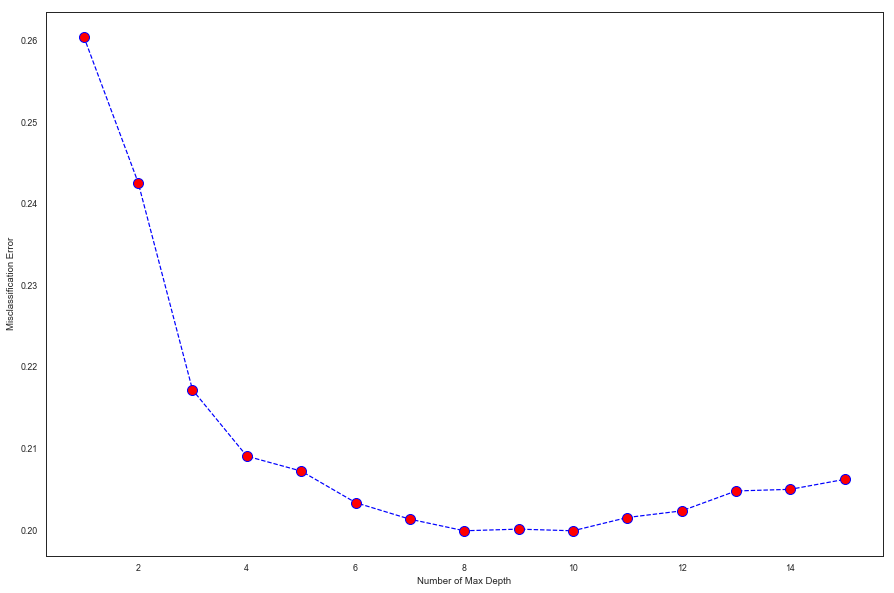

In [65]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = max_depth[MSE.index(min(MSE))]
print("The optimal number of Max Depth is:", optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(max_depth, MSE,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number of Max Depth')
plt.ylabel('Misclassification Error')
plt.show()


<h3>4.2 KNeighborsClassifier</h3>

In [66]:
from sklearn.neighbors import KNeighborsClassifier
k_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Applying GridSearch to find better parameters:

In [67]:
parameters = {
    'n_neighbors'      : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights'         : ['uniform','distance'],
    'metric'      : ['euclidean', 'manhattan'],
}

In [68]:
grid_knn = GridSearchCV(KNeighborsClassifier(), parameters, refit=True, verbose=3, scoring='accuracy', cv=5, n_jobs=4) 

In [69]:
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed:   36.4s
[Parallel(n_jobs=4)]: Done 301 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 525 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [73]:
#RESULTADOS
churn = {'Knn':[grid_knn.best_params_,grid_knn.best_score_]}
print('Parametros', grid_knn.best_params_)
print('Accuracy', grid_knn.best_score_)
print('Estimator:', grid_knn.best_estimator_)

Parametros {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}
Accuracy 0.7996749288906948
Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')


Checking the best estimator:

In [74]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [76]:
pred = knn.predict(X_test)

In [77]:
print("Churn")
print("Classification Report")
print(classification_report(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print('Accuracy', churn['Knn'][1])

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1523
           1       0.65      0.51      0.57       587

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Confusion Matrix
[[1362  161]
 [ 288  299]]
Accuracy 0.7996749288906948


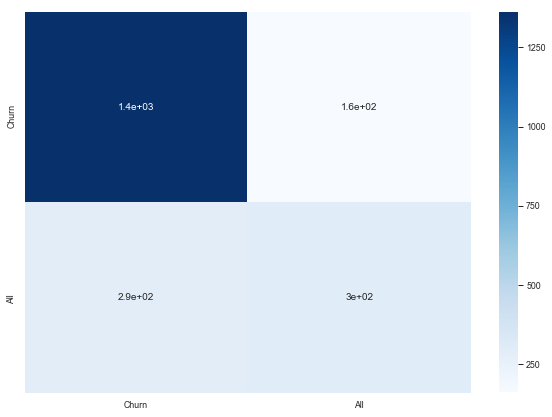

In [78]:
cm=confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index = ['Churn','All'],
                  columns = ['Churn','All'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [79]:
cv_scores = []
for i in k_range:
    
    knn_e = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=i, p=2,
           weights='uniform')
    scores = cross_val_score(knn_e, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is: 30


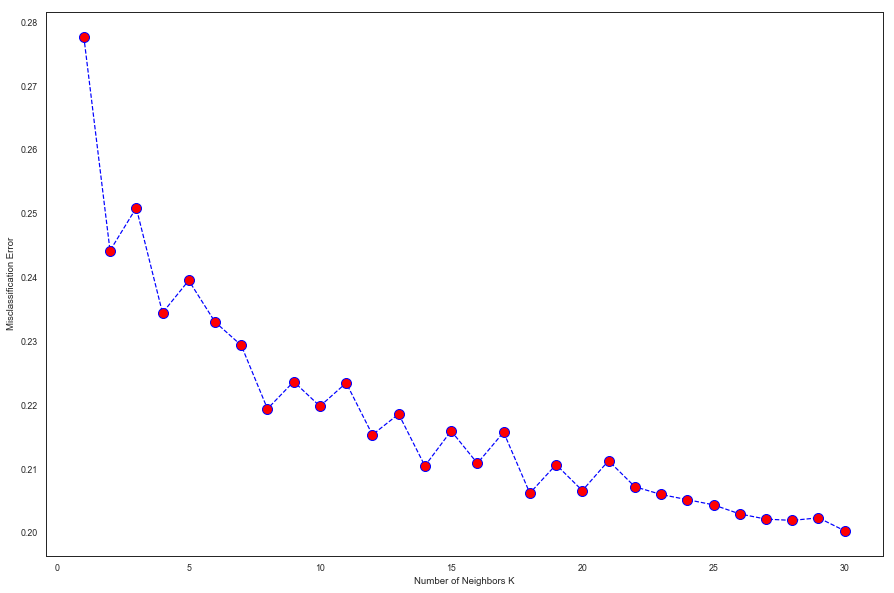

In [80]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is:", optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(k_range, MSE,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


<h3>4.3 XGBoosts</h3>

In [81]:
#XGBoosts
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Applying GridSearch to find better parameters:

In [82]:
gamma = [0, 0.001, 0.01, 0.1,1 , 2, 5]

In [83]:
param_grid = {
   'max_depth': [3,4],
   'n_estimators': [100,150],
   'nthread': [8],
   'subsample': [0,0.9, 1.0],
   'gamma': [0, 0.001, 0.01, 0.1,1 , 2, 5],
   'min_child_weight': [1, 5, 10]
}


In [84]:
grid_gb = GridSearchCV(XGBClassifier(), param_grid=param_grid, refit=True, verbose=3, scoring='accuracy', n_jobs=4)

In [85]:
grid_gb.fit(X_train, y_train)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   52.3s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 756 out of 756 | elapsed:  5.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [3, 4], 'n_estimators': [100, 150], 'nthread': [8], 'subsample': [0, 0.9, 1.0], 'gamma': [0, 0.001, 0.01, 0.1, 1, 2, 5], 'min_child_weight': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [86]:
#RESULTADOS
if 'churn' in globals():
    churn['xgb'] = [grid_gb.best_params_,grid_gb.best_score_]
else:
    churn = {'xgb':[grid_gb.best_params_,grid_gb.best_score_]}

print('Parametros', grid_gb.best_params_)
print('Accuracy', grid_gb.best_score_)
print('Estimator:', grid_gb.best_estimator_)

Parametros {'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100, 'nthread': 8, 'subsample': 0.9}
Accuracy 0.8063795205201137
Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=10, missing=None, n_estimators=100,
       n_jobs=1, nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)


Checking the best estimator:

In [87]:
xgb = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=2, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=8,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0)

In [88]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1.0)

In [89]:
pred = xgb.predict(X_test)

In [90]:
print("Churn")
print("Classification Report")
print(classification_report(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print('Accuracy', churn['xgb'][1])

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1523
           1       0.69      0.54      0.61       587

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

Confusion Matrix
[[1384  139]
 [ 271  316]]
Accuracy 0.8063795205201137


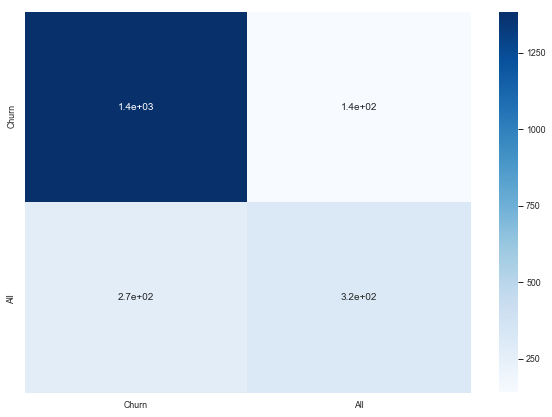

In [91]:
cm=confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm, index = ['Churn','All'],
                  columns = ['Churn','All'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [92]:
cv_scores = []
for i in gamma:
    
    xgb_e = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=i, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=8,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0)
    scores = cross_val_score(xgb_e, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal gamma is: 5


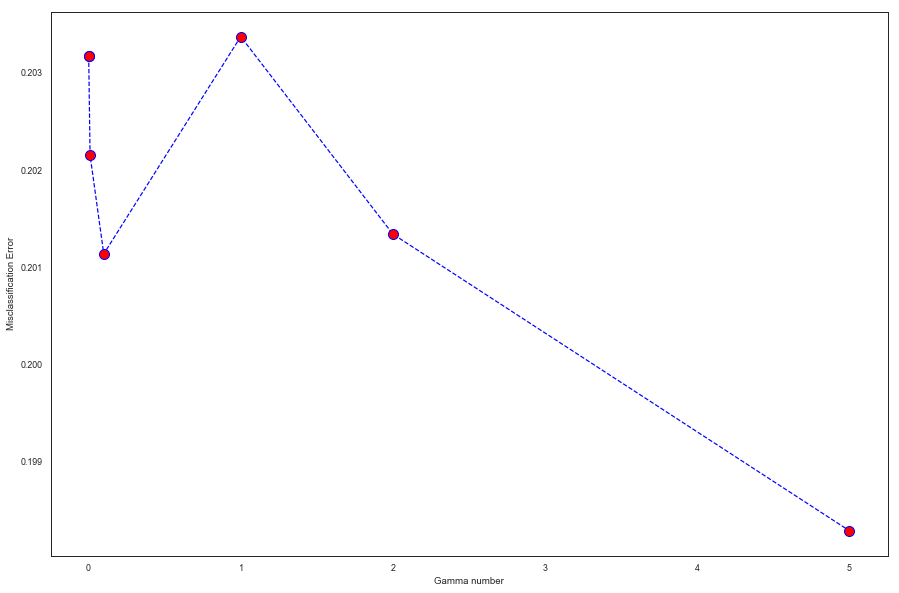

In [93]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal = gamma[MSE.index(min(MSE))]
print("The optimal gamma is:", optimal)

# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(gamma, MSE,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Gamma number')
plt.ylabel('Misclassification Error')
plt.show()

<h3>4.4 Linear Suport Vector Machine</h3>

In [99]:
from sklearn.svm import LinearSVC
C = [0.1, 1, 10, 100,500,1000]

Applying GridSearch to find better parameters:

In [100]:
param_grid = {'C': [0.1, 1, 10, 100,500,1000]}
grid_lsvm = GridSearchCV(LinearSVC(),param_grid,refit=True,verbose=3,scoring='accuracy', n_jobs=4)

In [101]:
grid_lsvm.fit(X_train,y_train)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    2.3s finished
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'C': [0.1, 1, 10, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [102]:
churn['LinearSVC'] = [grid_lsvm.best_params_,grid_lsvm.best_score_]
print('Parametros', grid_lsvm.best_params_)
print('Accuarcy', grid_lsvm.best_score_)
print('Estimator:', grid_lsvm.best_estimator_)

Parametros {'C': 10}
Accuarcy 0.8023161316537992
Estimator: LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [103]:
lsvc=LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Checking the best estimator:

In [104]:
lsvc.fit(X_train,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [105]:
pred = lsvc.predict(X_test)

In [106]:
print("Churn")
print("Classification Report")
print(classification_report(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print('Accuracy', churn['LinearSVC'][1])

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1523
           1       0.71      0.50      0.59       587

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.80      0.79      2110

Confusion Matrix
[[1404  119]
 [ 293  294]]
Accuracy 0.8023161316537992


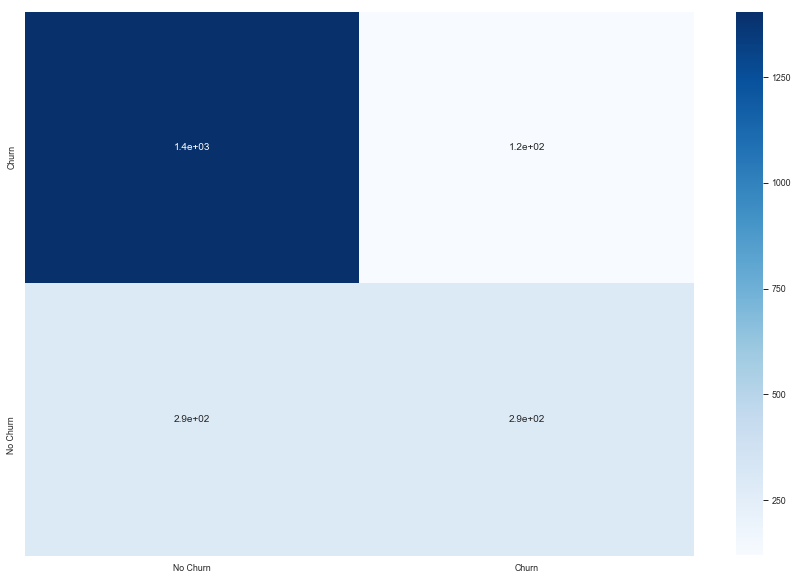

In [107]:
cm=confusion_matrix(y_test,pred)
sns.set_context(font_scale=2)
df_cm = pd.DataFrame(cm, index = ['Churn','No Churn'],
                  columns = ['No Churn','Churn'])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [108]:
cv_scores = []
for i in C:
    
    lsvc_e = LinearSVC(C=i, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
    scores = cross_val_score(lsvc_e, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

The optimal C is: 1


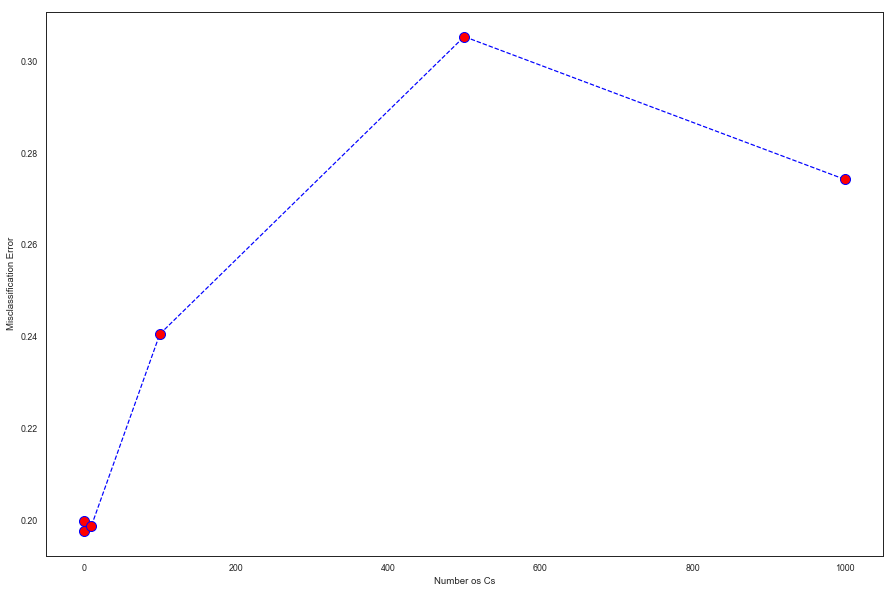

In [109]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal = C[MSE.index(min(MSE))]
print("The optimal C is:", optimal)

# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(C, MSE,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number os Cs')
plt.ylabel('Misclassification Error')
plt.show()

<h3>4.5 Suport Vector Machine</h3>

In [110]:
from sklearn.svm import SVC

Applying GridSearch to find better parameters:

In [111]:
Csvc = [1,10,100,1000]

In [112]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf']}

In [113]:
grid_svc = GridSearchCV(SVC(),param_grid,refit = True, verbose=3)

In [114]:
grid_svc.fit(X_train,y_train)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.7801461632155907, total=   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.7853658536585366, total=   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.7774390243902439, total=   0.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7874543239951279, total=   0.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.800609756097561, total=   0.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7987804878048781, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.7442143727161997, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.7396341463414634, total=   0.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.7396341463414634, total=   0.6s
[CV] C=1, gamma=0.0001, kernel=rbf ..................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [115]:
if 'churn' in globals():
    churn['SVC'] = [grid_svc.best_params_,grid_svc.best_score_]
else:
    churn = {'SVC':[grid_svc.best_params_,grid_svc.best_score_]}
 
print('Parametros', grid_svc.best_params_)
print('Accuarcy', grid_svc.best_score_)
print('Estimator:', grid_svc.best_estimator_)

Parametros {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuarcy 0.7984559122308005
Estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Checking the best estimator:

In [116]:
svm = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
pred = svm.predict(X_test)

In [119]:
print("Churn")
print("Classification Report")
print(classification_report(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print('Accuracy', churn['SVC'][1])

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1523
           1       0.73      0.46      0.57       587

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.77      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix
[[1421  102]
 [ 315  272]]
Accuracy 0.7984559122308005


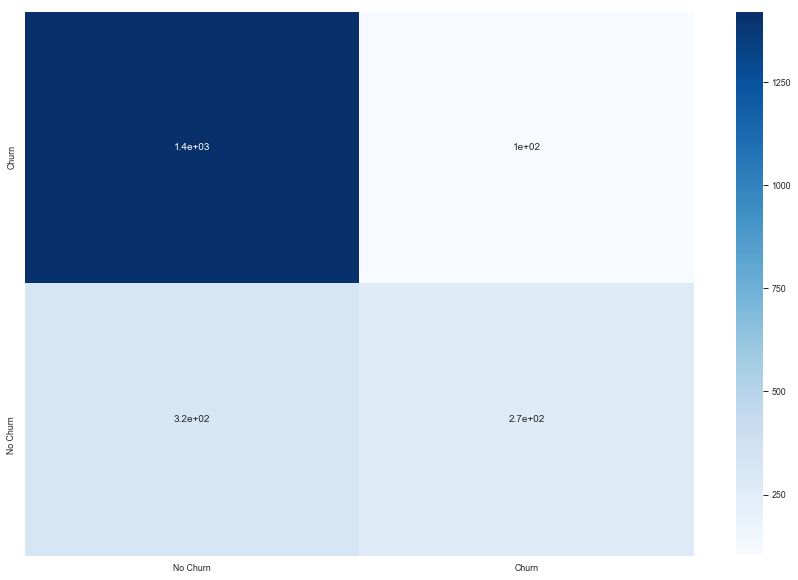

In [120]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize = (15,10))
sns.set_context(font_scale=2)
df_cm = pd.DataFrame(cm, index = ['Churn','No Churn'],
                  columns = ['No Churn','Churn'])

sns.heatmap(df_cm, annot=True, cmap='Blues')

In [121]:
cv_scores = []
for i in Csvc:
    
    svc_e = SVC(C=i, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
    scores = cross_val_score(svc_e, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal C is: 1


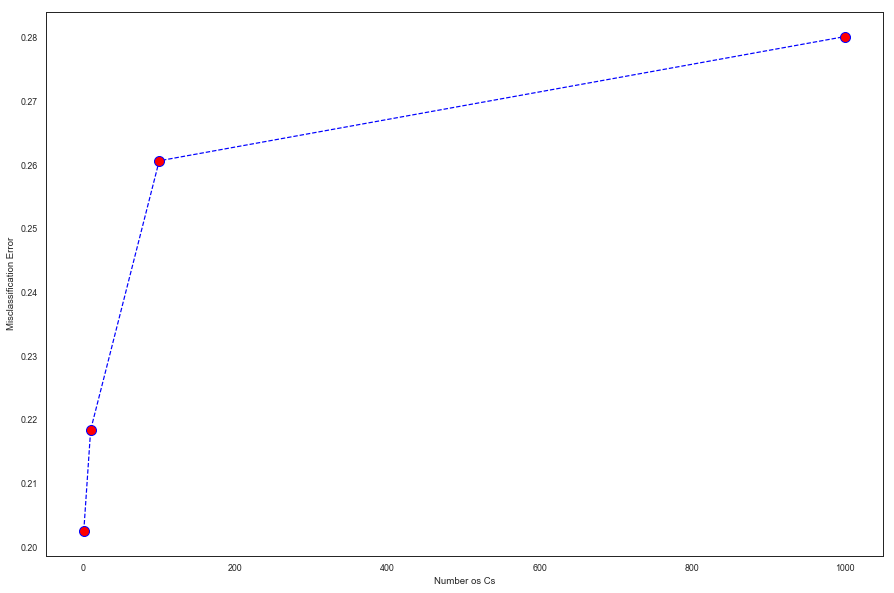

In [122]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal = Csvc[MSE.index(min(MSE))]
print("The optimal C is:", optimal)

# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(Csvc, MSE,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number os Cs')
plt.ylabel('Misclassification Error')
plt.show()

<h3>4.6 Logistic Regression </h3>

In [123]:
from sklearn.linear_model import LogisticRegression

Applying GridSearch to find better parameters:

In [124]:
Clog = [0.001,0.01,0.1,1,10,100,1000]

In [125]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [126]:
grid_log = GridSearchCV(LogisticRegression(),param_grid=grid_values,refit = True, verbose=3)

In [127]:
grid_log.fit(X_train, y_train)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7393422655298416, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7396341463414634, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7396341463414634, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.7722289890377588, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.7731707317073171, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.7731707317073171, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.0

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv


[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.7987804878048781, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.7911084043848965, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...... C=0.01, penalty=l2, score=0.802439024390244, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...... C=0.01, penalty=l2, score=0.801829268292683, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.7965895249695494, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8036585365853659, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.7993902439024391, total=   0.0s
[CV] 

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv


[CV] C=0.1, penalty=l2 ...............................................
[CV] ....... C=0.1, penalty=l2, score=0.801219512195122, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.8063337393422655, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ........ C=1, penalty=l1, score=0.8054878048780488, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=0.8, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.8057247259439708, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.8054878048780488, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ......... C=1, penalty=l2, score=0.801219512195122, total=   0.0s
[CV] 

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ....... C=10, penalty=l1, score=0.8032886723507917, total=   0.7s
[CV] C=10, penalty=l1 ................................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ....... C=10, penalty=l1, score=0.8073170731707318, total=   0.4s
[CV] C=10, penalty=l1 ................................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ........ C=10, penalty=l1, score=0.801829268292683, total=   0.5s
[CV] C=10, penalty=l2 ................................................
[CV] ........ C=10, penalty=l2, score=0.805115712545676, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.8073170731707318, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ........ C=10, penalty=l2, score=0.801829268292683, total=   0.0s
[CV] C=100, penalty=l1 ...............................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=100, penalty=l1, score=0.8020706455542022, total=   0.6s
[CV] C=100, penalty=l1 ...............................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=100, penalty=l1, score=0.8079268292682927, total=   0.7s
[CV] C=100, penalty=l1 ...............................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=100, penalty=l1, score=0.8030487804878049, total=   0.5s
[CV] C=100, penalty=l2 ...............................................
[CV] ...... C=100, penalty=l2, score=0.8014616321559074, total=   0.0s
[CV] C=100, penalty=l2 ...............................................
[CV] ...... C=100, penalty=l2, score=0.8085365853658537, total=   0.0s
[CV] C=100, penalty=l2 ...............................................
[CV] ...... C=100, penalty=l2, score=0.8036585365853659, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=1000, penalty=l1, score=0.8020706455542022, total=   0.6s
[CV] C=1000, penalty=l1 ..............................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=1000, penalty=l1, score=0.8079268292682927, total=   0.7s
[CV] C=1000, penalty=l1 ..............................................


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=1000, penalty=l1, score=0.8030487804878049, total=   0.6s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.8014616321559074, total=   0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.8085365853658537, total=   0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.8048780487804879, total=   0.0s


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    7.4s finished
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [136]:
if 'churn' in globals():
    churn['log'] = [grid_log.best_params_,grid_log.best_score_]
else:
    churn = {'log':[grid_log.best_params_,grid_log.best_score_]}
 
print('Parametros', grid_log.best_params_)
print('Accuarcy', grid_log.best_score_)
print('Estimator:', grid_log.best_estimator_)

Parametros {'C': 1000, 'penalty': 'l2'}
Accuarcy 0.8049573344169036
Estimator: LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Checking the best estimator:

In [137]:
lr = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
lr.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
pred=lr.predict(X_test)

In [140]:
print("Churn")
print("Classification Report")
print(classification_report(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print('Accuracy', churn['log'][1])

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1523
           1       0.69      0.53      0.60       587

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix
[[1383  140]
 [ 277  310]]
Accuracy 0.8049573344169036


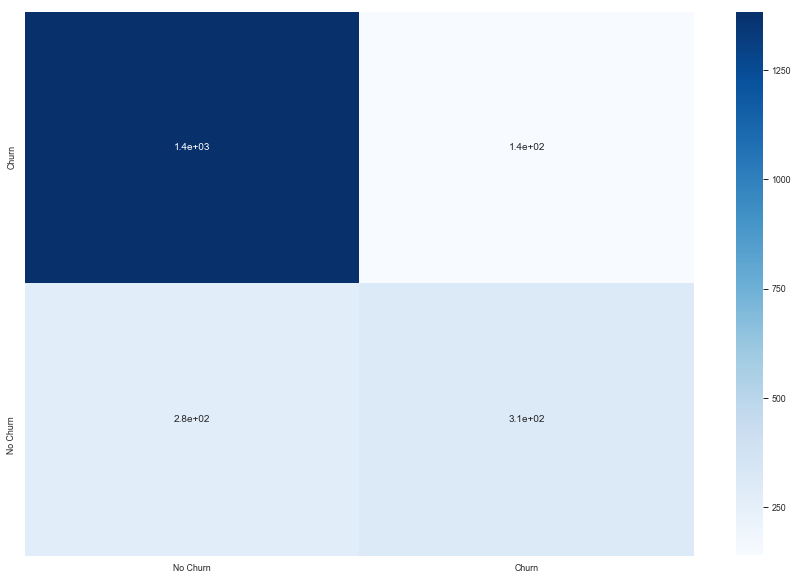

In [141]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize = (15,10))
sns.set_context(font_scale=2)
df_cm = pd.DataFrame(cm, index = ['Churn','No Churn'],
                  columns = ['No Churn','Churn'])

sns.heatmap(df_cm, annot=True, cmap='Blues')

In [142]:
cv_scores = []
for i in Clog:
    
    log_e = LogisticRegression(C=i, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
    scores = cross_val_score(log_e, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal C is: 10


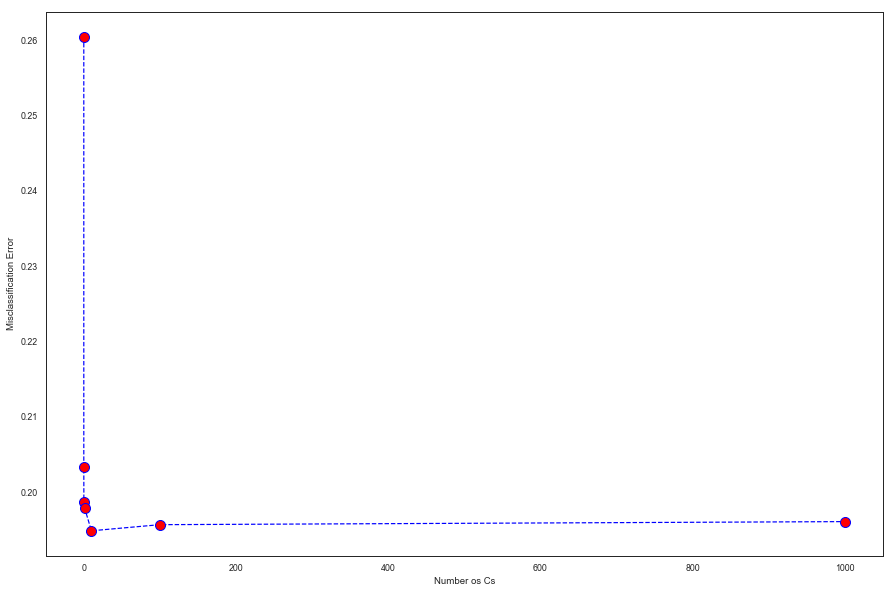

In [143]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal = Clog[MSE.index(min(MSE))]
print("The optimal C is:", optimal)

# plot misclassification error vs k
plt.figure(figsize=(15,10))
plt.plot(Clog, MSE,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number os Cs')
plt.ylabel('Misclassification Error')
plt.show()

In [144]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from IPython.display import SVG
from keras.optimizers import Adam
from keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras import losses
from keras.layers import Embedding
from keras.layers import LSTM
#import pydot
from imblearn.over_sampling import SMOTE

In [145]:
os = SMOTE(random_state = 0,  k_neighbors=10)

#Train set
X_smote_os,y_smote_os = os.fit_sample(X_train,y_train)
X_smote_os = pd.DataFrame(data = X_smote_os,columns= telco.drop(['customerID','Churn'], axis=1).columns)
y_smote_os  = pd.DataFrame(data = y_smote_os,columns=["Churn"])

X_matrix_smote = X_smote_os.as_matrix()
y_matrix_smote =y_smote_os.as_matrix()

#Test set
X_smote_os_test,y_smote_os_test = os.fit_sample(X_test,y_test)
X_smote_os_test = pd.DataFrame(data = X_smote_os_test,columns= telco.drop(['customerID','Churn'], axis=1).columns)
y_smote_os_test  = pd.DataFrame(data = y_smote_os_test,columns=["Churn"])

X_matrix_smote_test = X_smote_os.as_matrix()
y_matrix_smote_test =y_smote_os.as_matrix()

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<h3>4.7 Deep Learning - Model training</h3>

In [146]:
n_cols=X_matrix_smote.shape[1]
model = Sequential()
model.add(Dense(32, input_shape=(n_cols,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                928       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


Training the Model:

In [147]:
history = model.fit(X_matrix_smote, y_matrix_smote, epochs=150, batch_size=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
7280/7280 [==============================] - 1s 184us/step - loss: 0.5774 - acc: 0.7537
Epoch 2/150
7280/7280 [==============================] - 1s 108us/step - loss: 0.5184 - acc: 0.7798
Epoch 3/150
7280/7280 [==============================] - 1s 107us/step - loss: 0.4921 - acc: 0.7880
Epoch 4/150
7280/7280 [==============================] - 1s 108us/step - loss: 0.4784 - acc: 0.7912
Epoch 5/150
7280/7280 [==============================] - 1s 108us/step - loss: 0.4652 - acc: 0.7981
Epoch 6/150
7280/7280 [==============================] - 1s 111us/step - loss: 0.4551 - acc: 0.8016 0s - loss: 0.4433 
Epoch 7/150
7280/7280 [==============================] - 1s 107us/step - loss: 0.4462 - acc: 0.8060
Epoch 8/150
7280/7280 [==============================] - 1s 107us/step - loss: 0.4376 - acc: 0.8133
Epoch 9/150
7280/7280 [==============================] - 1s 107us/step - loss: 0.4307 - acc: 0.8140
Epoch 10/150
7280/7280 [=========

7280/7280 [==============================] - 1s 192us/step - loss: 0.2499 - acc: 0.9114
Epoch 80/150
7280/7280 [==============================] - 1s 170us/step - loss: 0.2485 - acc: 0.9147
Epoch 81/150
7280/7280 [==============================] - 1s 173us/step - loss: 0.2429 - acc: 0.9192
Epoch 82/150
7280/7280 [==============================] - 1s 187us/step - loss: 0.2536 - acc: 0.9102
Epoch 83/150
7280/7280 [==============================] - 1s 188us/step - loss: 0.2409 - acc: 0.9176
Epoch 84/150
7280/7280 [==============================] - 1s 167us/step - loss: 0.2437 - acc: 0.9159
Epoch 85/150
7280/7280 [==============================] - 1s 160us/step - loss: 0.2417 - acc: 0.9201
Epoch 86/150
7280/7280 [==============================] - 1s 164us/step - loss: 0.2439 - acc: 0.9190
Epoch 87/150
7280/7280 [==============================] - 1s 165us/step - loss: 0.2413 - acc: 0.9184
Epoch 88/150
7280/7280 [==============================] - 1s 164us/step - loss: 0.2394 - acc: 0.9210
Epo

In [148]:
predictions   = model.predict(X_matrix_smote_test)
score = model.evaluate(X_matrix_smote_test, y_matrix_smote_test, verbose=0)

Checking performance:

In [149]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2173646228162797
Test accuracy: 0.9285714285714286


In [150]:
y_pred = (predictions > 0.5)
print("Churn")
print("Classification Report")
print(classification_report(y_matrix_smote_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_matrix_smote_test, y_pred))

Churn
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3640
           1       0.91      0.95      0.93      3640

   micro avg       0.93      0.93      0.93      7280
   macro avg       0.93      0.93      0.93      7280
weighted avg       0.93      0.93      0.93      7280

Confusion Matrix
[[3317  323]
 [ 197 3443]]


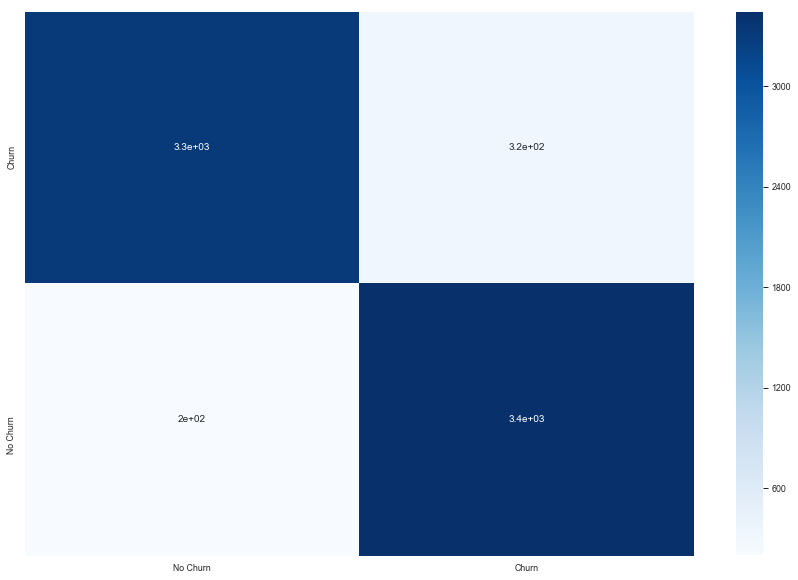

In [151]:
cm = confusion_matrix(y_matrix_smote_test, y_pred)
plt.figure(figsize = (15,10))
sns.set_context(font_scale=2)
df_cm = pd.DataFrame(cm, index = ['Churn','No Churn'],
                  columns = ['No Churn','Churn'])

sns.heatmap(df_cm, annot=True, cmap='Blues')

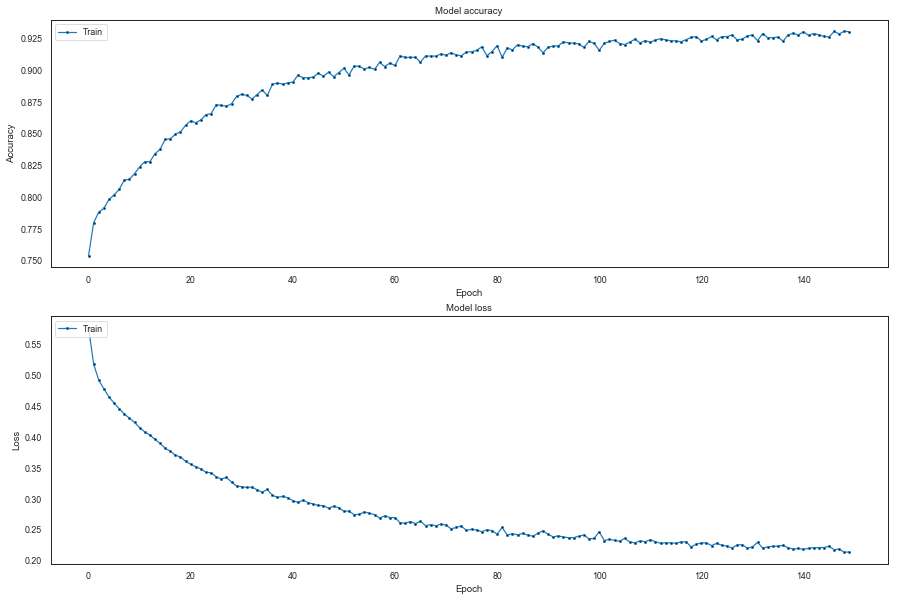

In [152]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(history.history['acc'], marker='o', markerfacecolor='black', markersize=2)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(212)
plt.plot(history.history['loss'], marker='o', markerfacecolor='black', markersize=2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


<h3>6. Evaluating Models</h3>
<ul>
<li>Performance	is	evaluated.</li>
<li>Metrics	</li>
    
</ul>    

<h3>Fucntion to evauluete models (machine learning)</h3>

In [193]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

In [180]:
def model_evaluate(model,train_x,test_x,train_y,test_y,name) :
    model.fit(train_x,train_y)
    predictions  = model.predict(test_x)
    
    predictions  = model.predict(test_x)
    accuracy     = accuracy_score(test_y,predictions)
    recallscore  = recall_score(test_y,predictions)
    precision    = precision_score(test_y,predictions)
    auc          = cross_val_score(model,test_x,test_y, scoring='roc_auc').mean()
    f1score      = f1_score(test_y,predictions) 
        
    df = pd.DataFrame({"0_Model"           :  name,
                       "1_Accuracy_score"  : [accuracy],
                       "2_Recall_score"    : [recallscore],
                       "3_Precision"       : [precision],
                       "4_f1_score"        : [f1score],
                       "5_Area_under_curve": [auc]                  
                      })
    
    
    return df

In [181]:
ml_models = np.array([rfc, knn, xgb, lr, lsvc, svm])

In [182]:
names=np.array(['RandomForestClassifier', 'KNeighborsClassifier', 'XGBClassifier','LogisticRegression','LinearSVC', 'SVC'])

In [183]:
results = pd.DataFrame()
i=0

In [184]:
recallscore  = recall_score(y_matrix_smote_test,y_pred)
precision    = precision_score(y_matrix_smote_test,y_pred)
f1score      = f1_score(y_matrix_smote_test,y_pred) 
auc = roc_auc_score(y_matrix_smote_test,y_pred)

In [185]:
roc_auc_score(y_matrix_smote_test,y_pred)

0.9285714285714285

In [186]:
keras_model_result=pd.DataFrame({"0_Model"           : 'KerasSequencial',
                       "1_Accuracy_score"  : [score[1]],
                       "2_Recall_score"    : [recallscore],
                       "3_Precision"       : [precision],
                       "4_f1_score"        : [f1score],
                       "5_Area_under_curve": [auc]                  
                      })

<h3>Evaluating machine learning models</h3>

In [187]:
for l in  ml_models:
    results=results.append(model_evaluate(l ,X_train,X_test,y_train,y_test,names[i]))
    i = i+1

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

<h3>Results</h3>

In [188]:
results=results.append(keras_model_result).reset_index().drop('index', axis=1)

In [189]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    if s.dtype == 'float64':
        return ['background-color: yellow' if v else '' for v in is_max]
    else:
        return ['background-color: white' if v else '' for v in is_max]

In [190]:
results.style.apply(highlight_max)

,0_Model,1_Accuracy_score,2_Recall_score,3_Precision,4_f1_score,5_Area_under_curve
0,RandomForestClassifier,0.799052,0.497445,0.693587,0.579365,0.844523
1,KNeighborsClassifier,0.787204,0.50937,0.65,0.571156,0.831315
2,XGBClassifier,0.805687,0.53833,0.694505,0.606526,0.845361
3,LogisticRegression,0.80237,0.528109,0.688889,0.597878,0.847864
4,LinearSVC,0.804739,0.500852,0.711864,0.588,0.84413
5,SVC,0.80237,0.463373,0.727273,0.566077,0.832796
6,KerasSequencial,0.928571,0.945879,0.914233,0.929787,0.928571
